# Support Vector Regression (SVR)

In [1]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
# importing the dataset

dataset = pd.read_csv(r'C:\Users\aryob\Documents\Bilquiss College\Machine Learning A-Z; AI, Python & R\Machine Learning-A-Z-Codes-Datasets\Machine Learning A-Z (Codes and Datasets)\Part 2 - Regression\Section 7 - Support Vector Regression (SVR)\Python\Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values 
y = dataset.iloc[:, -1].values


In [27]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [28]:
y = y.reshape(-1,1)

In [29]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [30]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [31]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [32]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [35]:
# Training the SVR model on the whole dataset

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())

SVR()

In [36]:
# Predicting a new result

sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

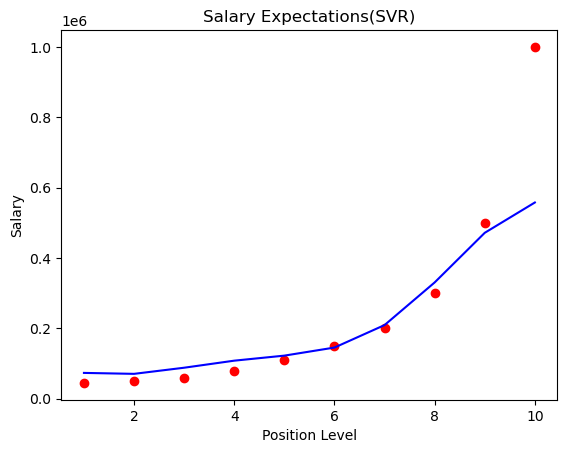

In [37]:
# Visualizing the SVR results

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Salary Expectations(SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

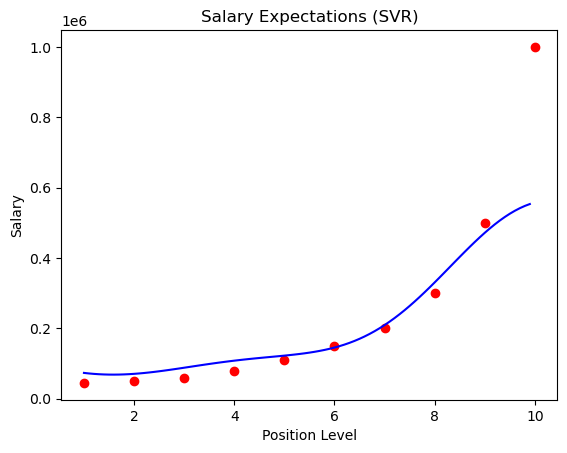

In [40]:
# Visualizing the SVR results (for higher resolution and smoother curve)

X_grid = np.arange(min(sc_X.inverse_transform(X)[:, 0]), max(sc_X.inverse_transform(X)[:, 0]), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color='blue')
plt.title('Salary Expectations (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()